## 문제
### daejeon_temperature.csv 파일에는 2013년 1월 1일부터 2022년 12월 31일까지의 일 평균기온, 최저기온, 최고기온 데이터가 존재한다. 이 데이터를 기반으로 년 평균기온, 최저기온, 최고기온을 그래프로 표시하시오.


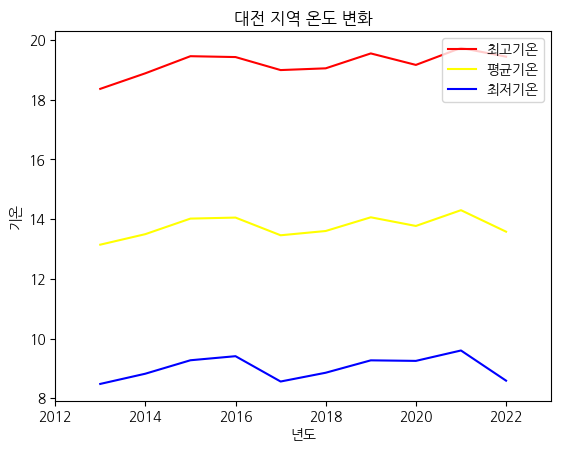

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('daejeon_temperature.csv', encoding='cp949')
df.rename(columns={'최고기온(°C)': 'max_temp'}, inplace=True)
df.rename(columns={'평균기온(°C)': 'avg_temp'}, inplace=True)
df.rename(columns={'최저기온(°C)': 'min_temp'}, inplace=True)


df['일시'] = pd.to_datetime(df['일시'], format='%Y-%m-%d')
df.set_index('일시', inplace=True)
df['year'] = pd.DatetimeIndex(df.index).year

avg_by_max = df.groupby(by=['year'], as_index=False)['max_temp'].mean()
avg_by_avg = df.groupby(by=['year'], as_index=False)['avg_temp'].mean()
avg_by_min = df.groupby(by=['year'], as_index=False)['min_temp'].mean()
avg_by_min

# temp = pd.merge(avg_by_max, avg_by_avg, on='year')
# daejeon_temp = pd.merge(temp, avg_by_min, on='year')
# daejeon_temp
plt.title('대전 지역 온도 변화')

plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

# plt.plot(daejeon_temp['year'], daejeon_temp['max_temp'], label='최고기온', color='red')
# plt.plot(daejeon_temp['year'], daejeon_temp['avg_temp'], label='평균기온', color='yellow')
# plt.plot(daejeon_temp['year'], daejeon_temp['min_temp'], label='최저기온', color='blue')
plt.plot(avg_by_max['year'], avg_by_max['max_temp'], label='최고기온', color='red')
plt.plot(avg_by_avg['year'], avg_by_avg['avg_temp'], label='평균기온', color='yellow')
plt.plot(avg_by_min['year'], avg_by_min['min_temp'], label='최저기온', color='blue')
plt.xlabel('년도')
plt.ylabel('기온')
plt.xlim(2012, 2023)
plt.legend()
plt.savefig('daejeon_temperature.png')
plt.show() # 그래프 그리기 종료: 메모리상의 그래프 이미지 삭제
